# **Importing** **Dataset**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Specify the file path
file_path = '/content/drive/MyDrive/sentiment-analysis.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(file_path)

# **Data Preprocessing**

In [29]:
# Split the 'CSV Data' into multiple columns
df_split = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)

# Assign appropriate column names
df_split.columns = ['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']

# Drop the original 'CSV Data' column and concatenate the split columns
df = pd.concat([df, df_split], axis=1)
df.drop(columns=['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], inplace=True)

# Display the DataFrame with split columns
print(df)

                                                 Text  Sentiment  \
0                              "I love this product!"   Positive   
1                         "The service was terrible."   Negative   
2                            "This movie is amazing!"   Positive   
3   "I'm so disappointed with their customer suppo...   Negative   
4                "Just had the best meal of my life!"   Positive   
..                                                ...        ...   
93  "I can't stop listening to this song. It's my ...   Positive   
94  "Their website is so confusing and poorly desi...   Negative   
95  "I had an incredible experience at the theme p...   Positive   
96                                                NaN        NaN   
97                                                NaN        NaN   

             Source             Date/Time         User ID      Location  \
0           Twitter   2023-06-15 09:23:14        @user123      New York   
1      Yelp Reviews   2023-06-15 

In [30]:
# Count of missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)


Text                2
Sentiment           2
Source              2
Date/Time           2
User ID             2
Location            2
Confidence Score    2
dtype: int64


In [31]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display the DataFrame after removing missing values
print(df)


                                                 Text  Sentiment  \
0                              "I love this product!"   Positive   
1                         "The service was terrible."   Negative   
2                            "This movie is amazing!"   Positive   
3   "I'm so disappointed with their customer suppo...   Negative   
4                "Just had the best meal of my life!"   Positive   
..                                                ...        ...   
91  "Just had the most amazing vacation! I can't w...   Positive   
92  "The food at this restaurant was awful. Never ...   Negative   
93  "I can't stop listening to this song. It's my ...   Positive   
94  "Their website is so confusing and poorly desi...   Negative   
95  "I had an incredible experience at the theme p...   Positive   

             Source             Date/Time             User ID      Location  \
0           Twitter   2023-06-15 09:23:14            @user123      New York   
1      Yelp Reviews   202

# **Exploratory Data Analysis**

In [32]:
# Summary statistics for numerical columns
print(df['Confidence Score'].astype(float).describe())


count    96.000000
mean      0.791771
std       0.133172
min       0.550000
25%       0.657500
50%       0.860000
75%       0.910000
max       0.950000
Name: Confidence Score, dtype: float64


The summary statistics for the "Confidence Score" data show that it has an average value of approximately 0.792, with a moderate level of variability (standard deviation of about 0.133). Scores range from 0.55 to 0.95, with the middle 50% falling between 0.6575 and 0.91.

In [33]:
# Count of each sentiment class
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)


 Positive    53
 Negative    43
Name: Sentiment, dtype: int64


In [34]:
# Count of entries for each source
source_counts = df['Source'].value_counts()
print(source_counts)


 Online Store           11
 Spotify                 9
 Zomato                  7
 Website Review          7
 IMDb                    6
 TripAdvisor             6
 Goodreads               6
 Yelp Reviews            6
 Website Testimonial     4
 Online Chat             4
 Event Review            3
 Theme Park Review       3
 Music Review            3
 Hotel Review            2
 Online Helpdesk         2
 Retail Store            2
 Twitter                 2
 Trip Report             2
 Amazon Reviews          2
 Online Forum            2
 Airline Review          1
 Gaming Forum            1
 Travel Website          1
 Food Blog               1
 TV Show Review          1
 Art Review              1
 Travel Blog             1
Name: Source, dtype: int64


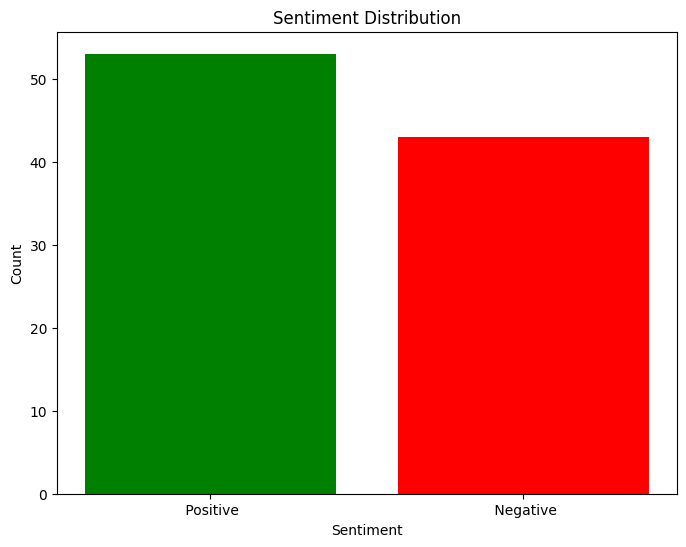

In [35]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


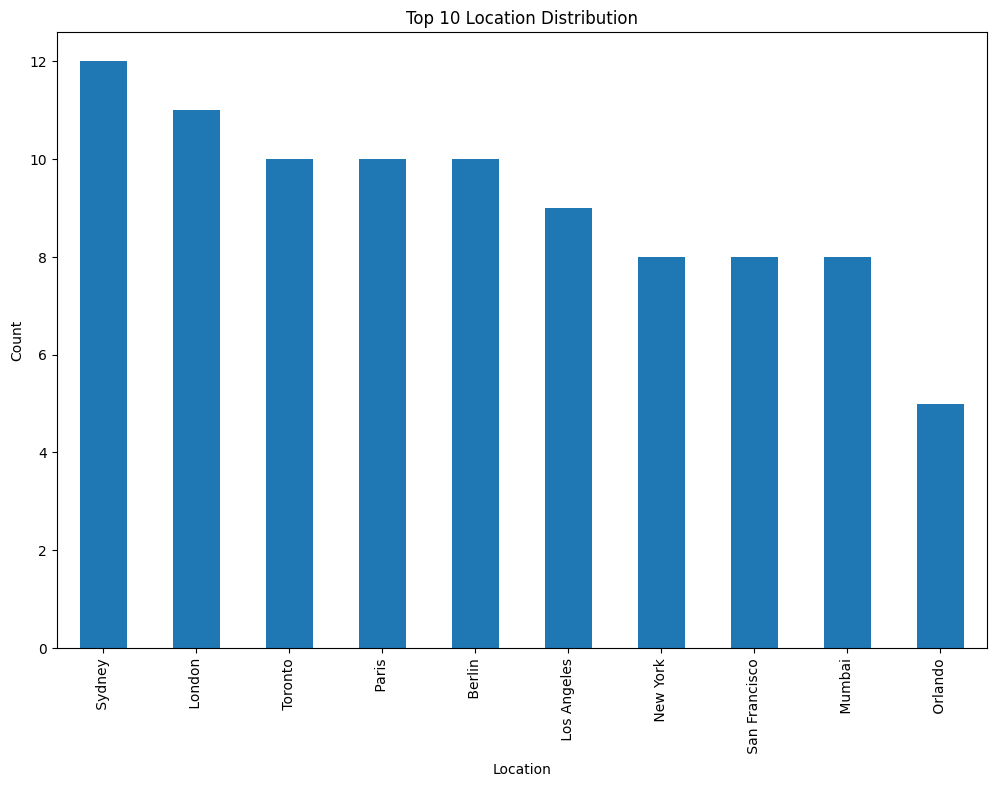

In [36]:
# Plot location distribution
plt.figure(figsize=(12, 8))
location_counts = df['Location'].value_counts()
location_counts[:10].plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Location Distribution')
plt.show()


# **Sentiment Analysis**

In [37]:
from textblob import TextBlob

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    else:
        return 'Negative'

# Apply sentiment analysis using TextBlob to the 'Text' column
df['Sentiment_TextBlob'] = df['Text'].apply(analyze_sentiment_textblob)

# Display the DataFrame with the additional 'Sentiment_TextBlob' column
print(df[['Text', 'Sentiment_TextBlob']])


                                                 Text Sentiment_TextBlob
0                              "I love this product!"           Positive
1                         "The service was terrible."           Negative
2                            "This movie is amazing!"           Positive
3   "I'm so disappointed with their customer suppo...           Negative
4                "Just had the best meal of my life!"           Positive
..                                                ...                ...
91  "Just had the most amazing vacation! I can't w...           Positive
92  "The food at this restaurant was awful. Never ...           Negative
93  "I can't stop listening to this song. It's my ...           Positive
94  "Their website is so confusing and poorly desi...           Negative
95  "I had an incredible experience at the theme p...           Positive

[96 rows x 2 columns]


In [38]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment_vader(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'


# Apply sentiment analysis using VADER to the 'Text' column
df['Sentiment_VADER'] = df['Text'].apply(analyze_sentiment_vader)

# Display the DataFrame with the additional 'Sentiment_VADER' column
print(df[['Text', 'Sentiment_VADER']])


                                                 Text Sentiment_VADER
0                              "I love this product!"        Positive
1                         "The service was terrible."            None
2                            "This movie is amazing!"            None
3   "I'm so disappointed with their customer suppo...        Negative
4                "Just had the best meal of my life!"        Positive
..                                                ...             ...
91  "Just had the most amazing vacation! I can't w...        Positive
92  "The food at this restaurant was awful. Never ...        Negative
93  "I can't stop listening to this song. It's my ...        Positive
94  "Their website is so confusing and poorly desi...        Negative
95  "I had an incredible experience at the theme p...            None

[96 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Understanding the sentiment analysis**

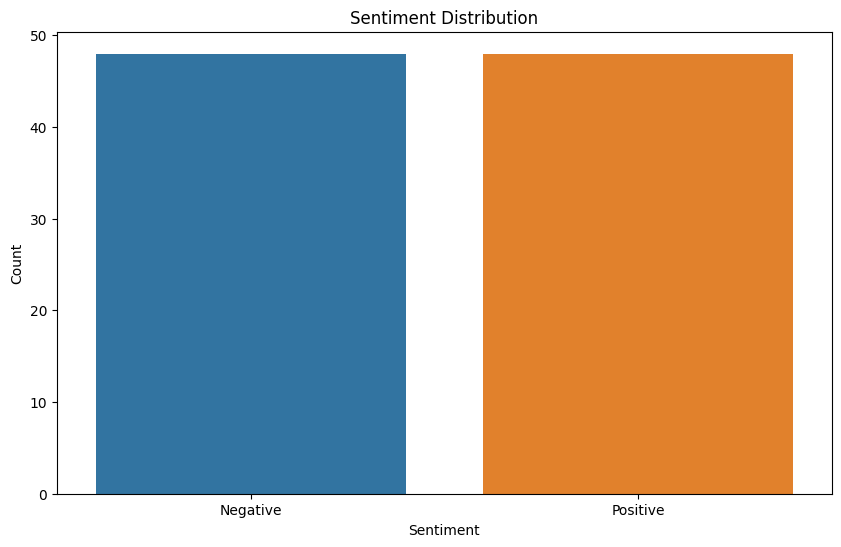

In [39]:
# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment_TextBlob', order=['Negative', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

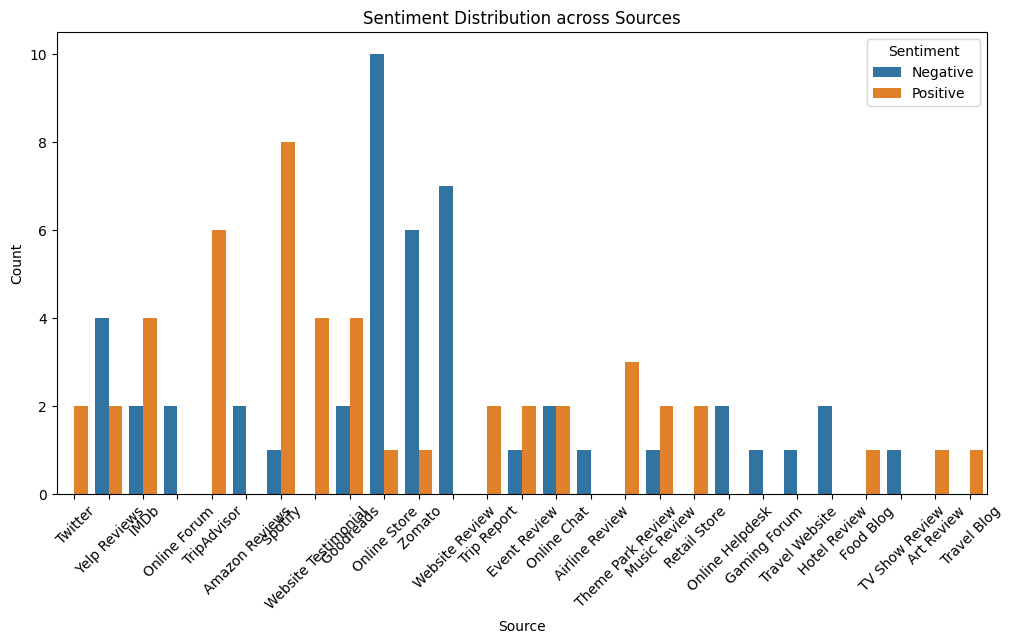

In [40]:
# Explore sentiment variations across sources
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Source', hue='Sentiment_TextBlob', hue_order=['Negative', 'Positive'])
plt.title('Sentiment Distribution across Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

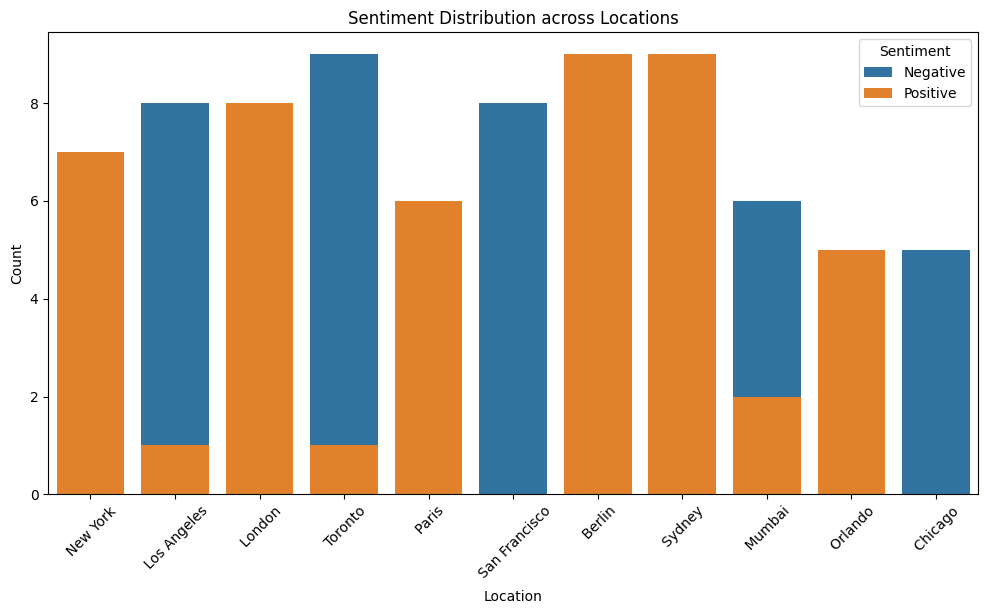

In [41]:
# Explore sentiment variations across locations
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', hue='Sentiment_TextBlob', hue_order=['Negative','Positive'], dodge=False)
plt.title('Sentiment Distribution across Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


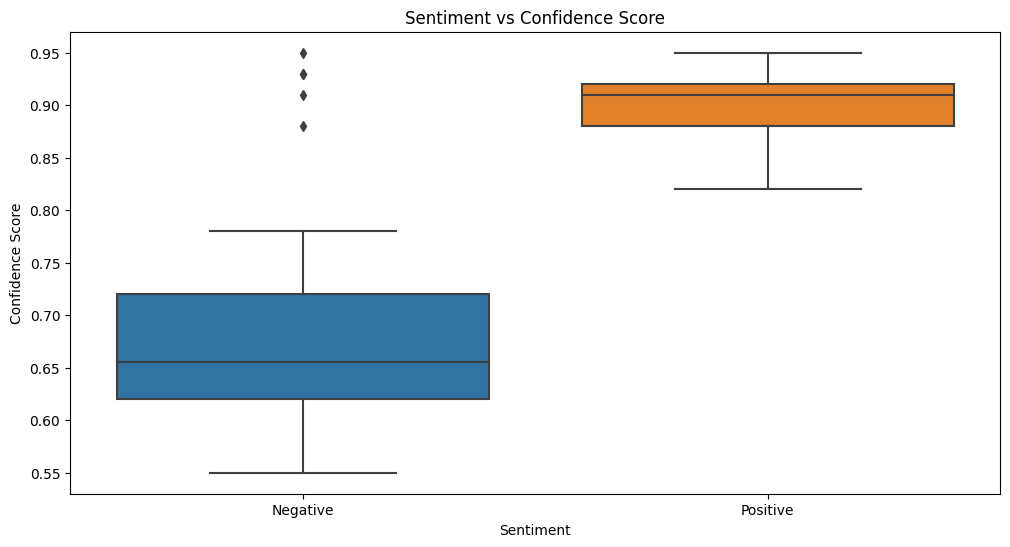

In [42]:
# Convert 'Confidence Score' to numeric
df['Confidence Score'] = pd.to_numeric(df['Confidence Score'], errors='coerce')

# Explore sentiment variations across confidence levels using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sentiment_TextBlob', y='Confidence Score', order=['Negative', 'Positive'])
plt.title('Sentiment vs Confidence Score')
plt.xlabel('Sentiment')
plt.ylabel('Confidence Score')
plt.show()

# **Feedback Analysis**

In [43]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources (stopwords and WordNet)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Function to preprocess the text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords, punctuation, and non-alphabetic words
    stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Preprocess the 'Text' column
df['Preprocessed_Text'] = df['Text'].apply(preprocess_text)

# Vectorize the preprocessed text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df['Preprocessed_Text'])

# Apply LDA
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda.fit_transform(tfidf_matrix)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10
top_words = []
for topic in lda.components_:
    top_words.append([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]])

# Print the top words for each topic
for i, words in enumerate(top_words):
    print(f'Topic {i+1}: {", ".join(words)}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1: terrible, service, love, customer, website, product, confusing, unprofessional, concert, hotel
Topic 2: disappointed, support, experience, food, customer, fun, restaurant, absolutely, ride, breathtaking
Topic 3: ca, product, quality, song, store, stop, listening, customer, wait, incredible
Topic 4: website, rude, staff, band, slow, difficult, frustrating, broke, poor, experience
Topic 5: movie, book, restaurant, highly, food, playlist, recommended, loved, best, finish


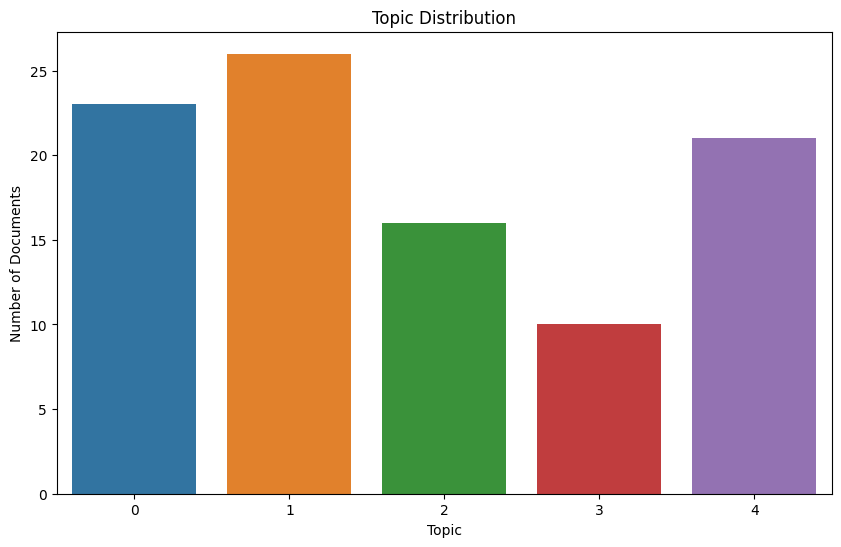

In [53]:
# Assign topics to each document
df['Dominant_Topic'] = lda_output.argmax(axis=1)

# Count the number of documents for each topic
topic_counts = df['Dominant_Topic'].value_counts()

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.show()


In [46]:
# Group by topic and sentiment, and count the number of documents
topic_sentiment_counts = df.groupby(['Dominant_Topic', 'Sentiment_TextBlob']).size().unstack()

# Calculate the proportion of negative sentiment for each topic
topic_sentiment_counts['Negative_Proportion'] = topic_sentiment_counts['Negative'] / topic_sentiment_counts.sum(axis=1)

# Sort topics by the proportion of negative sentiment (higher negative proportion indicates higher priority)
sorted_topics = topic_sentiment_counts.sort_values(by='Negative_Proportion', ascending=False).index

# Assign priority to each topic based on the sort order
topic_priority = {topic: priority + 1 for priority, topic in enumerate(sorted_topics)}

# Print the prioritized topics and their corresponding priorities
for topic, priority in topic_priority.items():
    print(f'Topic {topic + 1} - Priority: {priority}')


Topic 4 - Priority: 1
Topic 1 - Priority: 2
Topic 2 - Priority: 3
Topic 3 - Priority: 4
Topic 5 - Priority: 5


As we can see from the result above, to analyze the negative feedback to better the customer expirience we will have to consider the topics in the order 4,1,2,3,5. As the results from the code above demonstrates that topic 4 has the highest number of negative sentiments associated with it.